#Data Preparation using Std Scaler for Numerical data and get dummies for categorical data <B>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
import sklearn.tree as tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

from sklearn.metrics import accuracy_score


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

import joblib

In [2]:
train=pd.read_csv("train_preprocessed1.csv")
test=pd.read_csv("test_preprocessed1.csv")
submission=pd.read_csv("submission.csv")

In [3]:
train

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Item_ID_group_NCV,Item_ID_group_NCW,Item_ID_group_NCX,Item_ID_group_NCY,Item_ID_group_NCZ,Item_W,Item_MRP,Outlet_Age,Sales,Item_ID
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.410465,0.792848,-0.608131,2689.457781,FDU32
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.427374,-0.022995,1.925332,3437.350375,NCT54
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1.377664,0.927642,0.137005,3129.967268,FDW08
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.415644,1.724386,0.584087,1306.514376,FDJ22
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.460236,1.515922,1.776305,1739.769829,FDF47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87859,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,-1.081320,-0.037290,1.925332,4975.646052,FDG24
87860,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,-0.795661,-0.360028,1.925332,2252.492755,FDA32
87861,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,-0.767077,-0.508514,0.435059,2716.058050,FDM04
87862,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0.730786,1.225908,1.776305,991.857233,NCS18


In [4]:
test

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Item_ID_group_NCU,Item_ID_group_NCV,Item_ID_group_NCW,Item_ID_group_NCX,Item_ID_group_NCY,Item_ID_group_NCZ,Item_W,Item_MRP,Outlet_Age,Item_ID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1.044663,-0.503686,0.137005,DRM23
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,-0.981945,1.893577,1.925332,FDG47
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,-0.638847,1.605909,0.435059,FDN21
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.037554,-0.223204,-0.608131,FDZ23
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.836135,0.390649,-1.353268,FDC16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37651,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,-1.897623,0.476861,-1.353268,FDY27
37652,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,-1.836644,0.007297,-1.353268,FDK38
37653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-2.061362,-0.035291,0.435059,DRF01
37654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1.830998,-0.941885,-1.353268,FDR58


In [5]:
submission

,Sales
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
37651,0.0
37652,0.0
37653,0.0
37654,0.0


In [6]:
train_X = train.drop(columns=["Sales","Item_ID"])

In [7]:
train_y = train["Sales"]

In [8]:
test_X = test.drop(columns=["Item_ID"])

In [9]:
test_X

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Item_ID_group_NCT,Item_ID_group_NCU,Item_ID_group_NCV,Item_ID_group_NCW,Item_ID_group_NCX,Item_ID_group_NCY,Item_ID_group_NCZ,Item_W,Item_MRP,Outlet_Age
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1.044663,-0.503686,0.137005
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,-0.981945,1.893577,1.925332
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,-0.638847,1.605909,0.435059
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.037554,-0.223204,-0.608131
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.836135,0.390649,-1.353268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37651,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,-1.897623,0.476861,-1.353268
37652,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1.836644,0.007297,-1.353268
37653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-2.061362,-0.035291,0.435059
37654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1.830998,-0.941885,-1.353268


In [10]:
def model_fit(model, train_X, train_y, test_X, submission, filename):
    model.fit(train_X, train_y)
    train_pred = np.abs(model.predict(train_X))
    test_pred = np.abs(model.predict(test_X))
    
    train_RMSE=mean_squared_error(train_y, train_pred, squared=False)
    
    print("Train RMSE = ",train_RMSE)
    submission['Sales'] = np.abs(test_pred)
    submission.to_csv(filename, index = False)
    return train_RMSE

In [11]:
model = [LinearRegression(),Ridge(), Lasso(), ElasticNet(),KNeighborsRegressor(),DecisionTreeRegressor()]

In [12]:

for i in model:
    print(i)
    model_fit(i, train_X, train_y, test_X,submission, str(i)[:-2]+".csv")
   

LinearRegression()
Train RMSE =  1281.0862863263203
Ridge()
Train RMSE =  1280.991918022449
Lasso()
Train RMSE =  1281.7127107975598
ElasticNet()
Train RMSE =  1285.555249048529
KNeighborsRegressor()
Train RMSE =  1145.1951516974616
DecisionTreeRegressor()
Train RMSE =  20.053173508870653


In [13]:
def model_fit1(model, train_X, train_y, test_X):
    model.fit(train_X, train_y)
    train_pred = np.abs(model.predict(train_X))
    test_pred = np.abs(model.predict(test_X))
    train_RMSE=mean_squared_error(train_y, train_pred, squared=False)
    print(model)
    print("Train RMSE : ",train_RMSE)
    return train_RMSE

In [14]:
train_RMSE = []
for j in model:
    trainRMSE = model_fit1(j, train_X, train_y, test_X)
    train_RMSE.append(trainRMSE)
 

LinearRegression()
Train RMSE :  1281.0862863263203
Ridge()
Train RMSE :  1280.991918022449
Lasso()
Train RMSE :  1281.7127107975598
ElasticNet()
Train RMSE :  1285.555249048529
KNeighborsRegressor()
Train RMSE :  1145.1951516974616
DecisionTreeRegressor()
Train RMSE :  20.053173508870653


In [15]:
train_RMSE 

[1281.0862863263203,
 1280.991918022449,
 1281.7127107975598,
 1285.555249048529,
 1145.1951516974616,
 20.053173508870653]

In [16]:
model_name = ['LinearRegression','Ridge', 'Lasso','Elasticnet','KNeighborsRegressor','DecisionTreeRegressor']

In [17]:
model_name

['LinearRegression',
 'Ridge',
 'Lasso',
 'Elasticnet',
 'KNeighborsRegressor',
 'DecisionTreeRegressor']

In [18]:
result = pd.DataFrame([train_RMSE],columns=model_name).T

In [19]:
result.columns = ['train RMSE']

In [20]:
result

,train RMSE
LinearRegression,1281.086286
Ridge,1280.991918
Lasso,1281.712711
Elasticnet,1285.555249
KNeighborsRegressor,1145.195152
DecisionTreeRegressor,20.053174


<Figure size 7200x7200 with 0 Axes>

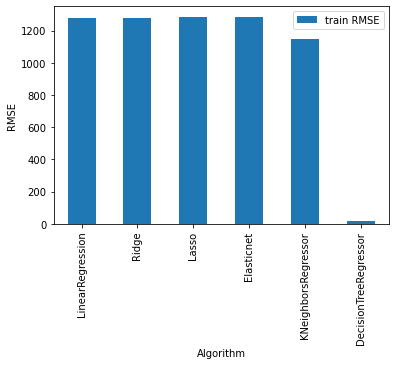

In [21]:
plt.figure(figsize=(100,100))
result.plot(kind = 'bar')
plt.xlabel("Algorithm")
plt.ylabel("RMSE")
plt.show()

------------------------#Hyperparameter------------------------
----------------------------------------------------------------------------------

In [24]:
res = []
for k in range(1,8):
    model = KNeighborsRegressor(n_neighbors=k)
    print(k)
    err = model_fit(model, train_X,train_y,test_X,submission, str(k)+"KNN.csv")
    res.append(err)
    

1
Train RMSE =  20.053173508870653
2
Train RMSE =  906.0882951407573
3
Train RMSE =  1047.3575884633026
4
Train RMSE =  1109.9490958045415
5
Train RMSE =  1145.1951516974616
6
Train RMSE =  1166.5591334990468
7
Train RMSE =  1182.655415437039
